In [15]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [17]:
# Define Class Names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Normalize pixel values (0-255 to 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

C:\Users\VRUND SHAH\AppData\Local\Temp\ipykernel_23080\572930601.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


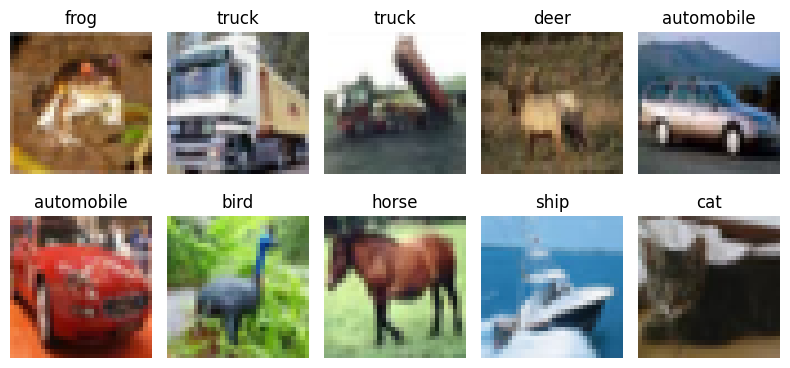

In [18]:
# Display sample images
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
# Build CNN Model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),  # 👈 Recommended Input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])



In [20]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# Train the Model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    verbose=2)


Epoch 1/10
1563/1563 - 11s - 7ms/step - accuracy: 0.4519 - loss: 1.5098 - val_accuracy: 0.5344 - val_loss: 1.2968
Epoch 2/10
1563/1563 - 10s - 6ms/step - accuracy: 0.5915 - loss: 1.1495 - val_accuracy: 0.6292 - val_loss: 1.0585
Epoch 3/10
1563/1563 - 10s - 6ms/step - accuracy: 0.6458 - loss: 0.9998 - val_accuracy: 0.6327 - val_loss: 1.0325
Epoch 4/10
1563/1563 - 10s - 7ms/step - accuracy: 0.6831 - loss: 0.8983 - val_accuracy: 0.6705 - val_loss: 0.9468
Epoch 5/10
1563/1563 - 10s - 7ms/step - accuracy: 0.7109 - loss: 0.8212 - val_accuracy: 0.6793 - val_loss: 0.9105
Epoch 6/10
1563/1563 - 10s - 6ms/step - accuracy: 0.7333 - loss: 0.7604 - val_accuracy: 0.6786 - val_loss: 0.9235
Epoch 7/10
1563/1563 - 10s - 7ms/step - accuracy: 0.7510 - loss: 0.7090 - val_accuracy: 0.6774 - val_loss: 0.9444
Epoch 8/10
1563/1563 - 10s - 6ms/step - accuracy: 0.7693 - loss: 0.6620 - val_accuracy: 0.7067 - val_loss: 0.8475
Epoch 9/10
1563/1563 - 10s - 6ms/step - accuracy: 0.7838 - loss: 0.6199 - val_accuracy: 

In [22]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 3ms/step - accuracy: 0.7144 - loss: 0.8641

✅ Test Accuracy: 0.7144


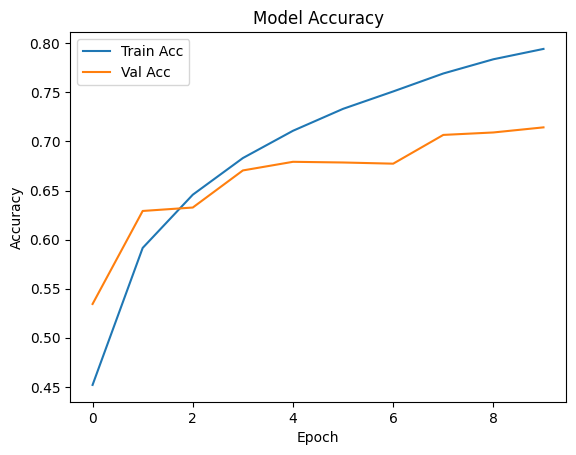

In [23]:
# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [24]:
# Make Predictions on Test Data
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


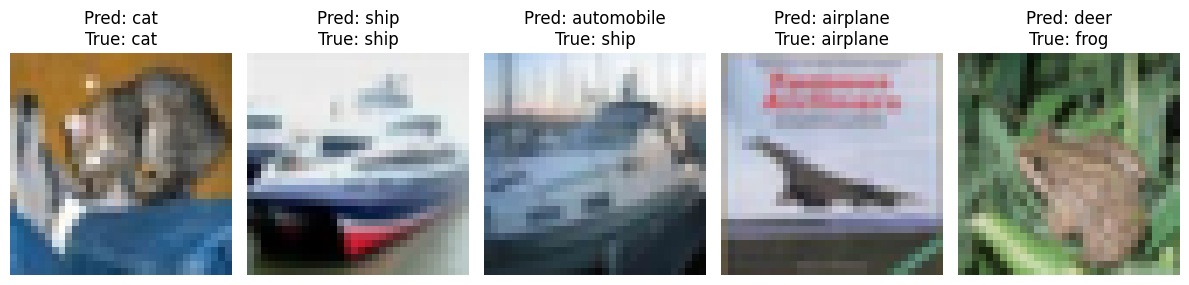

In [25]:
# Visualize Predictions vs. True Labels
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    true_label = class_names[y_test[i].item()]
    pred_label = class_names[y_pred_classes[i]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [26]:
# Save the Model
model.save("cifar10_cnn_model.keras")

print("\n✅ Model saved as cifar10_cnn_model.h5")


✅ Model saved as cifar10_cnn_model.h5
